# Exercise 17

![Exercise 17a](ex17a.png)
![Exercise 17b](ex17b.png)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy.signal import *
from scipy.fftpack import *

In [2]:
fs = 500  # sampling freq. in Hz
Ts = 1/fs # sampling interval
Nsamples = 68
T = np.linspace(0., (Nsamples-1)*Ts, num=Nsamples)
FREQ = fftfreq(Nsamples, Ts)

f1 = 25  # freq. of primary signal in Hz
f2 = 153 # freq. of secondary signal in Hz
A2dB = -40  # Amplitude of secondary signal in dB (primary is at 0 dB)

<IPython.core.display.Javascript object>


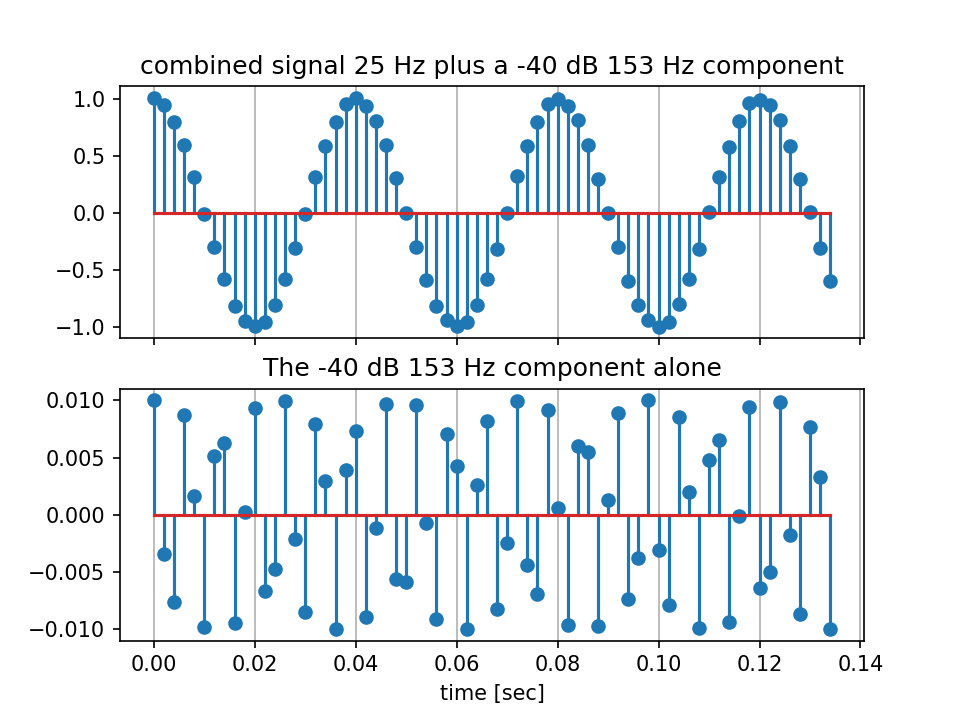

In [3]:
# calculate the mixed signal samples and show them
w1 = 2*pi*f1 # omega 1
w2 = 2*pi*f2 # omega 2
A2 = 10**(A2dB/20) # amplitude of f2

X1 =    np.cos(w1*T)
X2 = A2*np.cos(w2*T)
X = X1 + X2

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

ax1.stem(T, X)
ax1.set_title(rf'combined signal {f1} Hz plus a {A2dB} dB {f2} Hz component')
ax1.grid(axis='x')

ax2.stem(T,X2)
ax2.set_title(rf'The {A2dB} dB {f2} Hz component alone')
ax2.set_xlabel('time [sec]')
ax2.grid(axis='x')

<IPython.core.display.Javascript object>


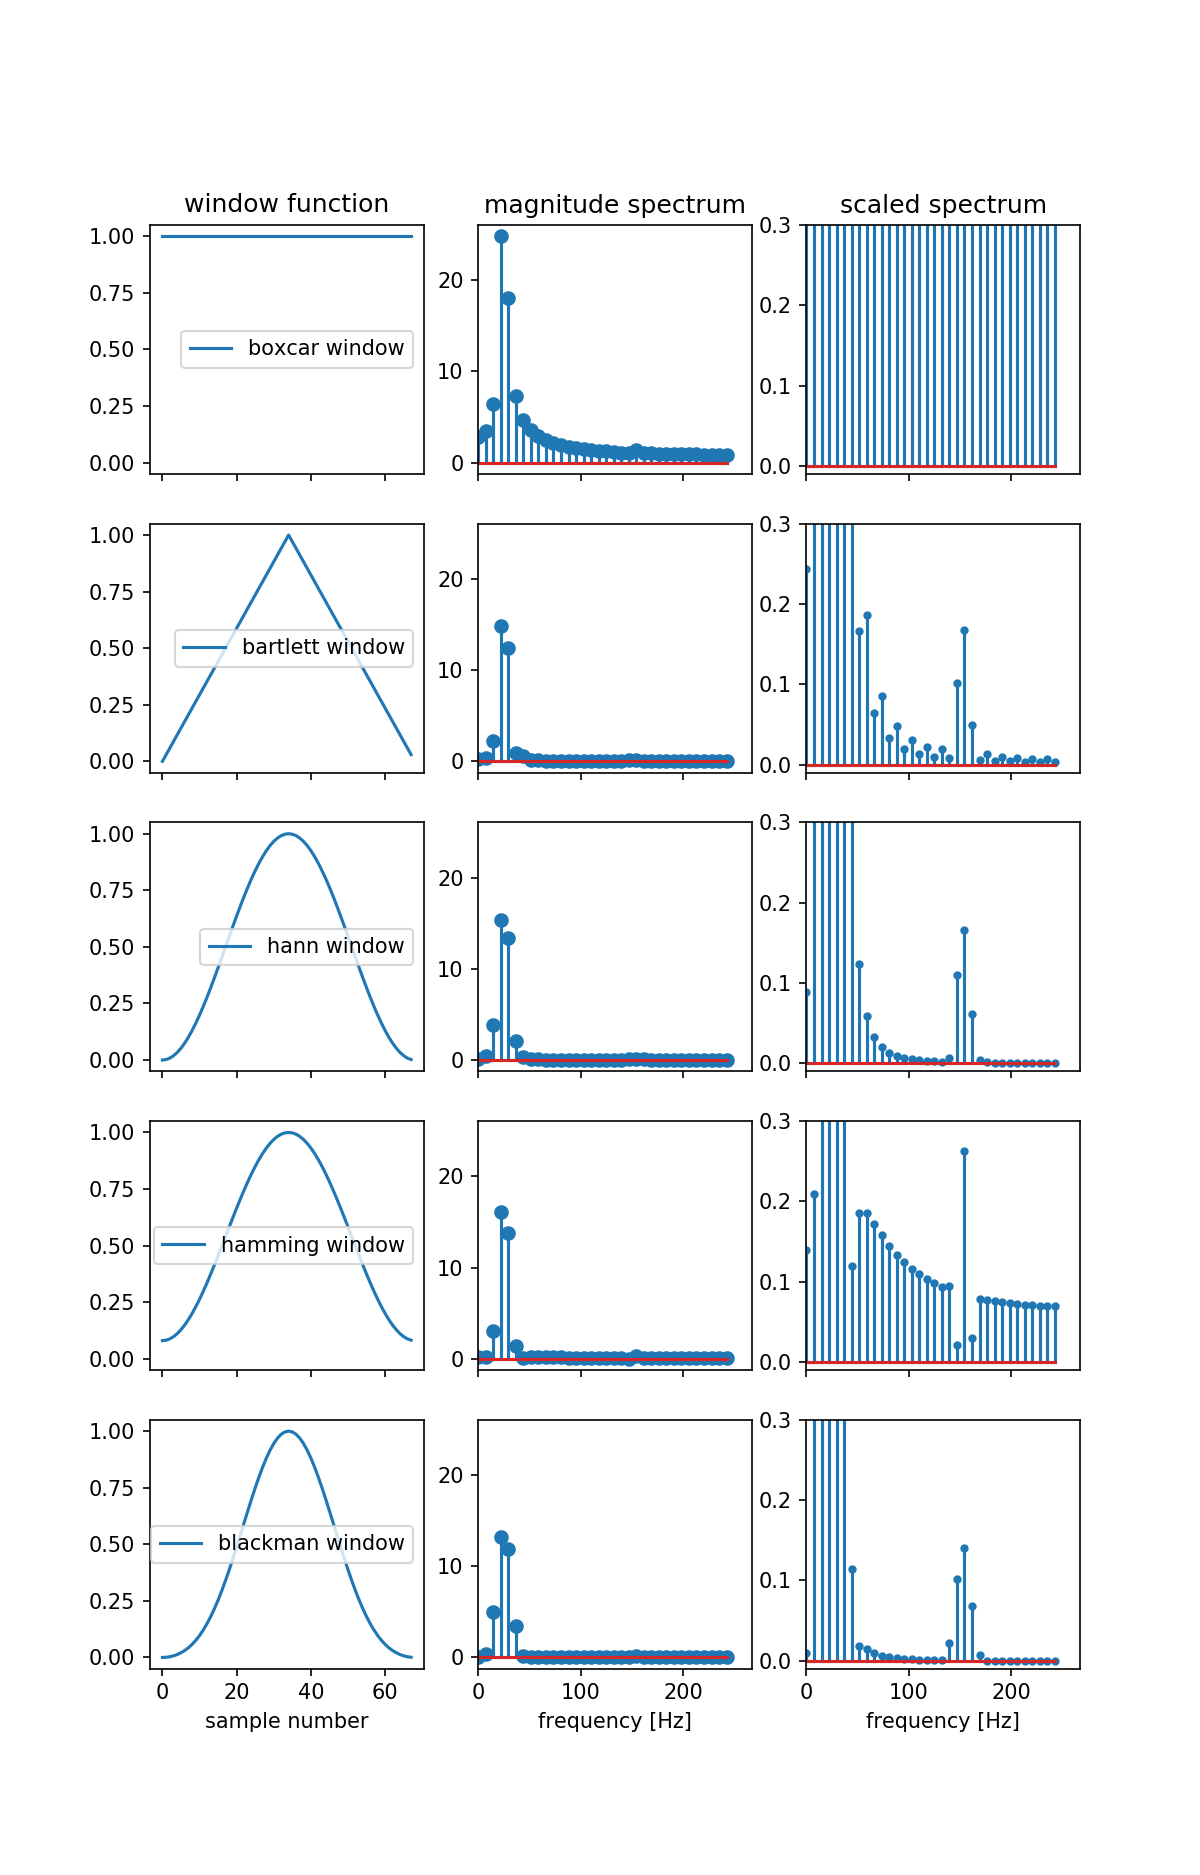

In [5]:
# calculate magnitude spectra with various window functions
WINDOWS = ( 'boxcar', 'bartlett', 'hann', 'hamming', 'blackman' )

fig, axs = plt.subplots(len(WINDOWS), 3, sharex='col', sharey='col', figsize=(8, 2.5*len(WINDOWS)))
axs[ 0,0].set_title('window function')
axs[-1,0].set_xlabel('sample number')

axs[ 0,1].set_title('magnitude spectrum')
axs[-1,1].set_xlabel('frequency [Hz]')

axs[ 0,2].set_title('scaled spectrum')
axs[-1,2].set_xlabel('frequency [Hz]')

for i, window in enumerate(WINDOWS):
    ax1, ax2, ax3 = axs[i,::]
    W = windows.get_window(window, Nsamples)
    ax1.plot(W, label=f"{window} window")
    ax1.legend(loc='center right')
    
    # compute spectrum with fft
    S = np.abs(fft(W*X))
    
    ax2.stem(FREQ, S)
    ax2.set_xlim(xmin=0) # cut off neg. freq.

    ax3.stem(FREQ, S, markerfmt='.')
    ax3.set_xlim(xmin=0) # cut off neg. freq.
    ax3.set_ylim(-A2, 30*A2)
#     ax3.stem(FREQ, 20*np.log10(S), markerfmt='.')
#     ax3.set_xlim(xmin=0) # cut off neg. freq.


---